# Assignment 1: Specification

### Task 1: Otus and HSV Threshoulding

#### import and tool function


In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import collections
from matplotlib.pyplot import MultipleLocator

#### Otus Thresholding

In [10]:
def otus_threasholding(img):
    '''
    img: images input
    '''
    # Compute the shape of the image and set threshold to default value
    row = img.shape[0] # 248
    coloum = img.shape[1] # 248
    # set threshold and max_var to its default value
    threshold = 0
    max_var = 0
    # Step through all possible thresholds
    for i in range(255):
        '''
        Set up w0 and u0
        '''
        n0 = img[np.where(img >= i)]  # the number of pixels that is larger or equal than threshold
        w0 = len(n0) / (row * coloum)  # the problitity of forground(\omega_0)
        m0 = np.mean(n0) # mean value

        n1 = img[np.where(img < i)]
        w1 = len(n1) / (row * coloum) # problitity
        m1 = np.mean(n1) # mean value
        # global mean
        ug = w0 * m0 + w1 * m1
        # Count the total vatiencve
        var = w0 * pow((m0 - ug), 2) + w1 * pow((m1 - ug), 2)
        # find the maximum var
        if var > max_var:
            max_var = var
            threshold = i
    # Set background to 0 and cell to 255
    for i in range(row):
        for j in range(coloum):
            if img[i][j] > threshold:
                img[i][j] = 0
            else:
                img[i][j] = 255
    return img, threshold

Current threshold is  202


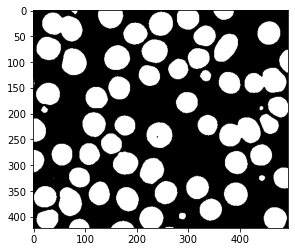

In [11]:
# read images
img = cv2.imread('images/c1.jpg')
gary = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
result, threshold = otus_threasholding(gary)
# plot the images
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('images/c1_otsu.jpg', result)
print("Current threshold is ", threshold)

Current threshold is  202


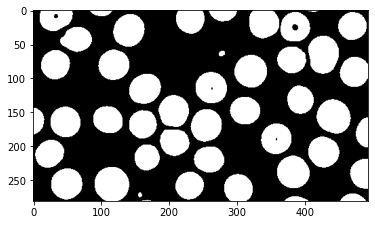

In [12]:
# read images
img = cv2.imread('images/c2.jpg')
gary = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
result, threshold = otus_threasholding(gary)
# plot the images
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('images/c2_otsu.jpg', result)
print("Current threshold is ", threshold)

Current threshold is  202


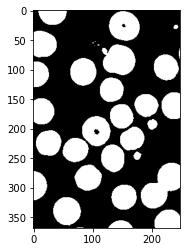

In [13]:
# read images
img = cv2.imread('images/c3.jpg')
gary = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
result, threshold = otus_threasholding(gary)
# plot the images
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('images/c3_otsu.jpg', result)
print("Current threshold is ", threshold)

Current threshold is  202


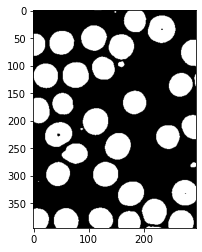

In [14]:
# read images
img = cv2.imread('images/c4.jpg')
gary = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
result, threshold = otus_threasholding(gary)
# plot the images
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('images/c4_otsu.jpg', result)
print("Current threshold is ", threshold)

#### HSV method

In [5]:
def nothing(x):
    pass


def hsv_threshold(img):
    '''
    Create Tracker Bar in order to find the appropriate value for sMax and Smin
    '''
    cv2.namedWindow('Tracking')
    cv2.createTrackbar('threshold', 'Tracking', 32, 255, nothing)

    quit = False
    while not quit:
        # obtain the size of img
        row = img.shape[0] # 248
        coloum = img.shape[1] # 248
        # convert img to HSV
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        # define range of  solor in HSV
        H, S, V = cv2.split(hsv)
        # obtain value from Trackerbar(Max value S and Min value S as threshold)
        threshold = cv2.getTrackbarPos('threshold', 'Tracking')

        # when upper than threshold Smax or lower than threshold Smin
        # set its value to 0 as background
        # or if the pixel is in range(Smin, Smax)
        # set its value to 255 as cells
        for i in range(row):
            for j in range(coloum):
                if S[i, j] < threshold:
                    hsv[i, j] = 0
                else:
                    hsv[i, j] = 255

        # show the hsv after 1 ms
        # that can show the slight changes as pull the bar
        cv2.imshow('hsv', hsv)
        key = cv2.waitKey(1)
        # if quit just press 'q' 
        if key == ord('q'):
            print("q pressed")
            print("current threshold is", threshold)
            quit = True
    return hsv

q pressed
current threshold is 28


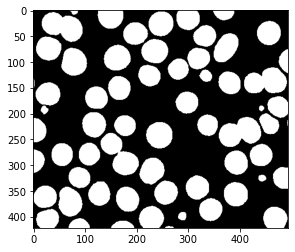

In [6]:
# read images
img = cv2.imread('images/c1.jpg')
hsv_result = hsv_threshold(img)
plt.imshow(hsv_result, cmap='gray')
cv2.destroyAllWindows()

q pressed
current threshold is 22


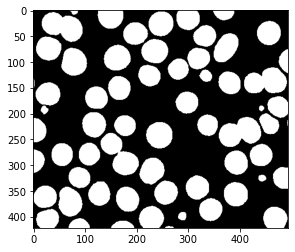

In [9]:
# read images
img = cv2.imread('images/c2.jpg')
hsv = hsv_threshold(img)
plt.imshow(hsv_result, cmap='gray')
cv2.destroyAllWindows()

q pressed
current threshold is 40


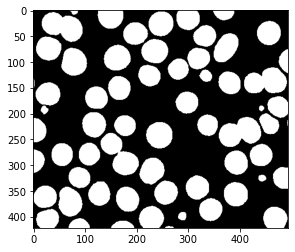

In [8]:
# read images
img = cv2.imread('images/c3.jpg')
hsv = hsv_threshold(img)
plt.imshow(hsv_result, cmap='gray')
cv2.destroyAllWindows()

q pressed
current threshold is 35


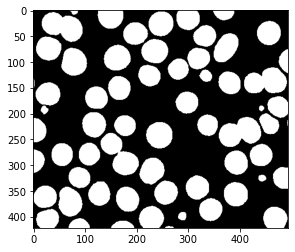

In [10]:
# read images
img = cv2.imread('images/c4.jpg')
hsv = hsv_threshold(img)
plt.imshow(hsv_result, cmap='gray')
cv2.destroyAllWindows()

In [11]:
def img_from_hsv(img_addr, threshold):
    '''
    Get the img if know the threshold from previous
    which is used in Task2
    '''
    # read images
    img = cv2.imread(img_addr)
    # obtain the size of img
    row = img.shape[0] # 248
    coloum = img.shape[1] # 248
    # convert img to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # define range of  solor in HSV
    H, S, V = cv2.split(hsv)

    # when upper than threshold Smax or lower than threshold Smin
    # set its value to 0 as background
    # or if the pixel is in range(Smin, Smax)
    # set its value to 255 as cells
    for i in range(row):
        for j in range(coloum):
            if S[i, j] < threshold:
                hsv[i, j] = 0
            else:
                hsv[i, j] = 255

    return hsv


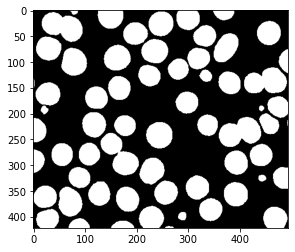

In [12]:
# plot the final result 
img_addr = 'images/c1.jpg'
threshold = 28
hsv_result = img_from_hsv(img_addr, threshold)
cv2.imwrite('images/hsv_c1.png', hsv_result)
cv2.destroyAllWindows()
plt.imshow(hsv_result, cmap='gray')
cv2.destroyAllWindows()

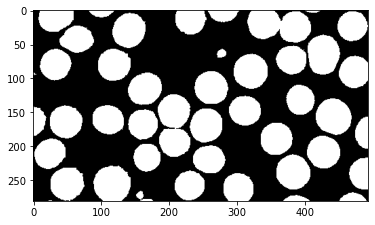

In [13]:
# plot the final result 
img_addr = 'images/c2.jpg'
threshold = 22
hsv_result = img_from_hsv(img_addr, threshold)
cv2.imwrite('images/hsv_c2.png', hsv_result)
cv2.destroyAllWindows()
plt.imshow(hsv_result, cmap='gray')
cv2.destroyAllWindows()

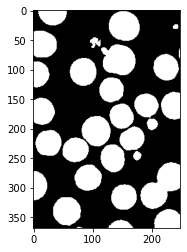

In [14]:
# plot the final result 
img_addr = 'images/c3.jpg'
threshold = 40
hsv_result = img_from_hsv(img_addr, threshold)
cv2.imwrite('images/hsv_c3.png', hsv_result)
cv2.destroyAllWindows()
plt.imshow(hsv_result, cmap='gray')
cv2.destroyAllWindows()

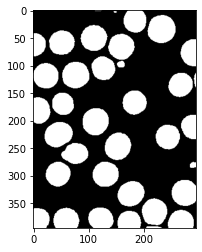

In [15]:
# plot the final result 
img_addr = 'images/c4.jpg'
threshold = 35
hsv_result = img_from_hsv(img_addr, threshold)
cv2.imwrite('images/hsv_c4.png', hsv_result)
cv2.destroyAllWindows()
plt.imshow(hsv_result, cmap='gray')
cv2.destroyAllWindows()

### Task 2: Counting the number of cells

Tool function

In [21]:
def Median_filter(input_img, filter_size):
    row = input_img.shape[0]
    column = input_img.shape[1]

    edge = int((filter_size - 1) / 2)

    new_img = np.zeros((row, column), dtype = 'uint8')

    for i in range(row):
        for j in range(column):
            if i <= edge - 1 or i >= row - 1 - edge or j <= edge - 1 or j >= column - edge - 1:
                new_img[i, j] = input_img[i, j]
            else:
                new_img[i, j] = np.median(img[i - edge: i + edge + 1, j - edge: j + edge + 1])

    return new_img


In [22]:
def counting_num_of_cells(binary_img, min_area, overlap_area):
    '''
    
    '''
    # size of the image
    row = binary_img.shape[0]
    column = binary_img.shape[1]
    # add padding to img to avoid border test
    binary_img = np.pad(binary_img, ((1, 1), (1, 1)), 'constant', constant_values= (0, 0))
    # create a label list using numpy
    # and set default value to 0 
    label = np.zeros((row + 2, column + 2), dtype = 'uint8')
    init_label = 1
    # first pass
    for i in range(1, row + 1):
        for j in range(1, column + 1):
            if binary_img[i][j] == 0: # if background
                label[i][j] = 0
            else: # if cell
                neighbors = [label[i-1][j-1], label[i+1][j+1],
                             label[i-1][j+1], label[i+1][j-1],
                             label[i][j-1], label[i][j+1],
                             label[i+1][j], label[i-1][j]]
                neighbor_values = []
                for neighbor in neighbors:
                    if neighbor != 0:
                        neighbor_values.append(neighbor)
                # if neighbors are all bg, uniquly label element
                if len(neighbor_values) == 0:
                    label[i][j] = init_label
                    init_label += 1
                else: # or find the minimum neiboring vlues
                    label[i][j] = min(neighbor_values)
    # second pass
    for i in range(1, row + 1):
        for j in range(1, column + 1):
            if label[i][j] != 0: # if not background
                neighbors = [label[i-1][j-1], label[i+1][j+1],
                             label[i-1][j+1], label[i+1][j-1],
                             label[i][j-1], label[i][j+1],
                             label[i+1][j], label[i-1][j]]
                for neighbor in neighbors:
                    if neighbor != 0:
                        tmp = label[i][j]
                        # relabel with the lowest equivalent label
                        label[i][j] = min(tmp, neighbor)

    # convert 2-dim to 1-dim in order to count occurrences
    number = 0
    label = label.flatten()
    label = [_ for _ in label if _ != 0]
    d = np.bincount(label)
    for i in range(1, len(d)):
        if i != 0 and d[i] > min_area:
            if d[i] > overlap_area:
                number = number + 2
            else:
                number = number + 1
    return number, d




In [55]:
def plot_distribution(d):
    # plot the distribution
    np.delete(d, 0)
    d = [_ for _ in d if _ != 0]

    plt.figure(figsize=(5, 20))
    ax = plt.gca()
    y_major_locator=MultipleLocator(30)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.scatter(range(len(d)), d)
    plt.show()

58


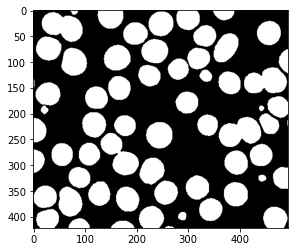

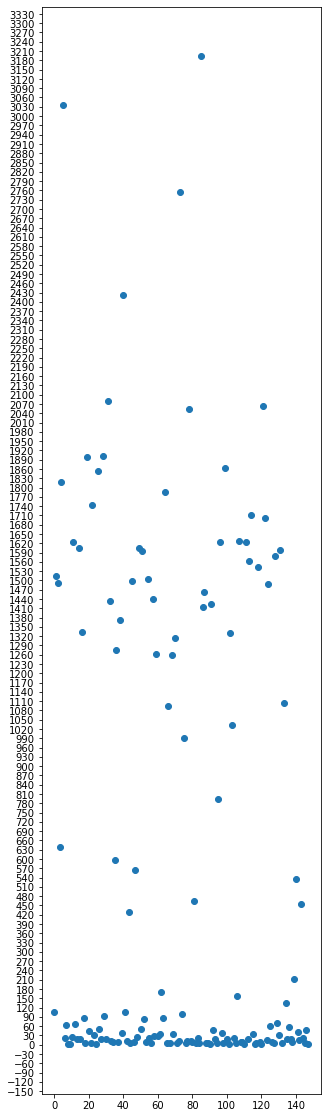

In [56]:
# read the image
img = cv2.imread('images/hsv_c1.png', 0)
output_img = Median_filter(img, 3) # process median filter to image
plt.imshow(output_img, cmap='gray')
cv2.imwrite('images/filtered_c1.png', output_img)
num, d = counting_num_of_cells(output_img, 300, 2800)
print(num)
plot_distribution(d)


40


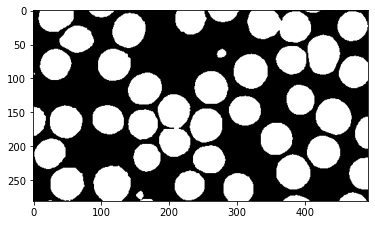

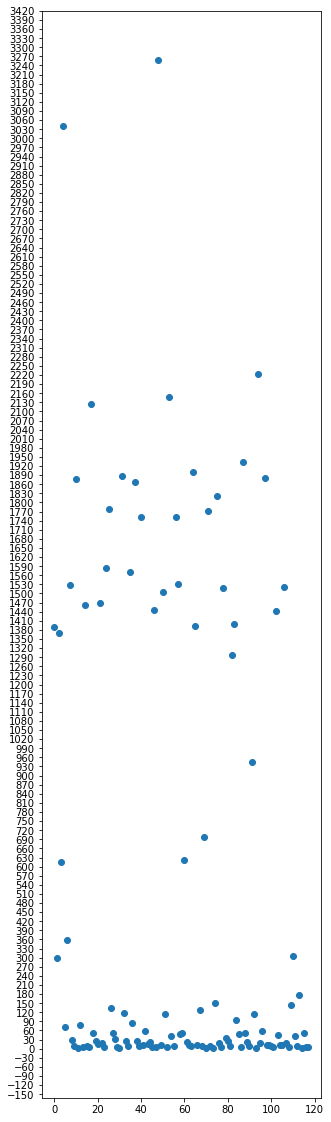

In [57]:
# read the image
img = cv2.imread('images/hsv_c2.png', 0)
output_img = Median_filter(img, 3) # process median filter to image
plt.imshow(output_img, cmap='gray')
cv2.imwrite('images/filtered_c2.png', output_img)
num, d = counting_num_of_cells(output_img, 300, 2800)
print(num)
plot_distribution(d)


25


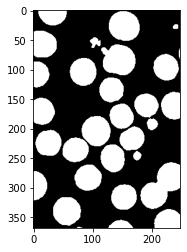

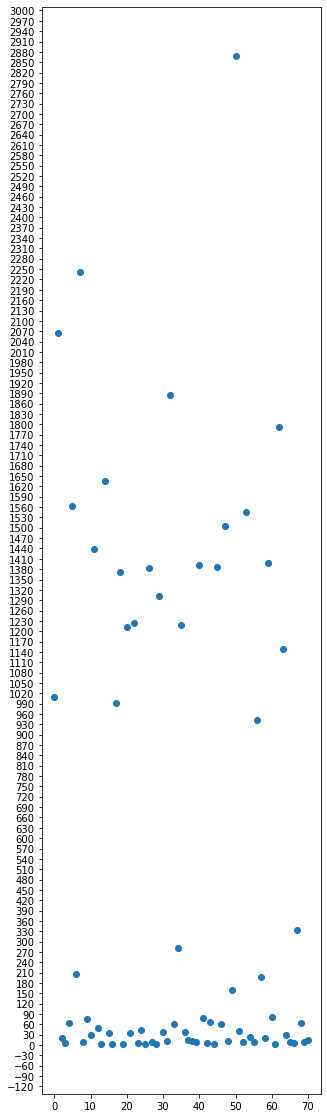

In [58]:
# read the image
img = cv2.imread('images/hsv_c3.png', 0)
output_img = Median_filter(img, 3) # process median filter to image
plt.imshow(output_img, cmap='gray')
cv2.imwrite('images/filtered_c3.png', output_img)
num, d = counting_num_of_cells(output_img, 300, 2800)
print(num)
plot_distribution(d)


30


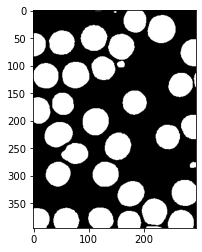

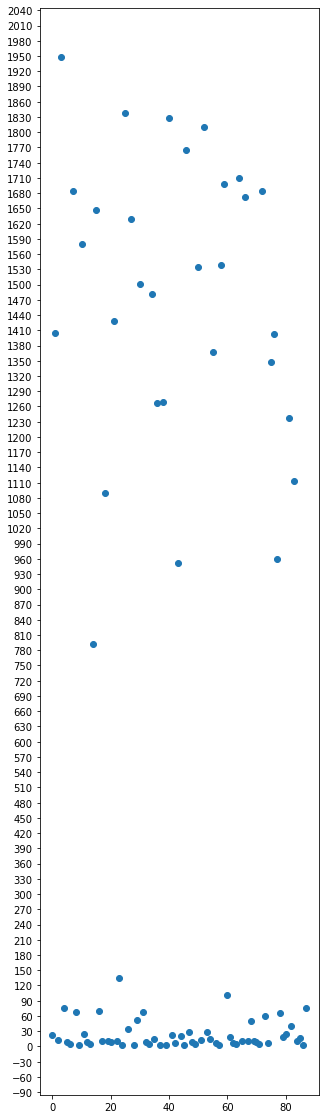

In [59]:
# read the image
img = cv2.imread('images/hsv_c4.png', 0)
output_img = Median_filter(img, 3) # process median filter to image
plt.imshow(output_img, cmap='gray')
cv2.imwrite('images/filtered_c4.png', output_img)
num, d = counting_num_of_cells(output_img, 300, 2800)
print(num)
plot_distribution(d)
